Problem Statement : 
    Create a Model to predict the price of house using Deep Learning 

In this project I have developed a model to predict the house price using Deep Learning techniques

I have used King County data set to solve the problem statement

In [3]:
#Import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
king_county = pd.read_csv('kc_house_data.csv')

In [3]:
king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
fig = plt.figure(figsize=(10,5))
#sns.histplot(y=king_county['price'], bins=50)
#sns.displot(y=king_county['price'])
#sns.scatterplot(data=king_county['price'])

<Figure size 720x360 with 0 Axes>

In [5]:
king_county['price'].describe()

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

# EDA

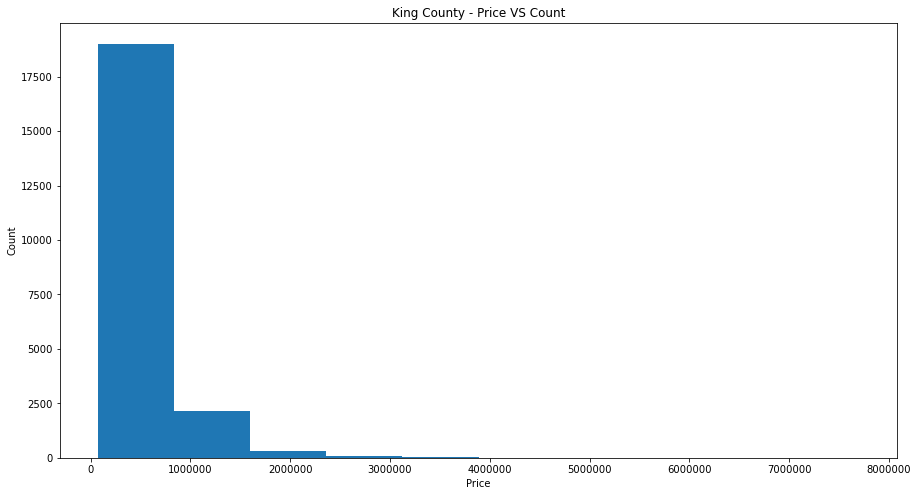

In [27]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
plt.hist(king_county['price'])
#ax.ticklabel_format(style='plain')

ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("King County - Price VS Count")
plt.show()


In [115]:
king_county['price'].sort_values(ascending=False).iloc[80:150]

19777    2641100.0
18409    2630000.0
13710    2600000.0
14822    2600000.0
9322     2575000.0
           ...    
15632    2271150.0
1282     2260000.0
20096    2250000.0
1676     2250000.0
6783     2250000.0
Name: price, Length: 70, dtype: float64

In [8]:
king_county['price'].count()

21613

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

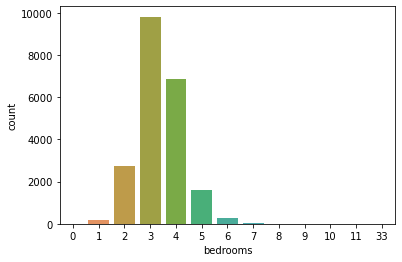

In [10]:
#Count plot for bed rooms
sns.countplot(data=king_county, x='bedrooms')

In [12]:
king_county['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [126]:
# View Correlations with other columns
king_county.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='price'>

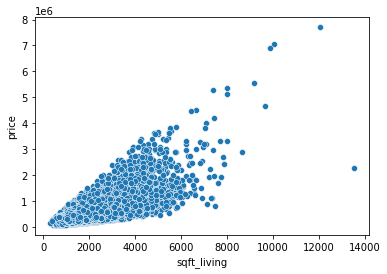

In [131]:
sns.scatterplot(data=king_county, y='price', x='sqft_living')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

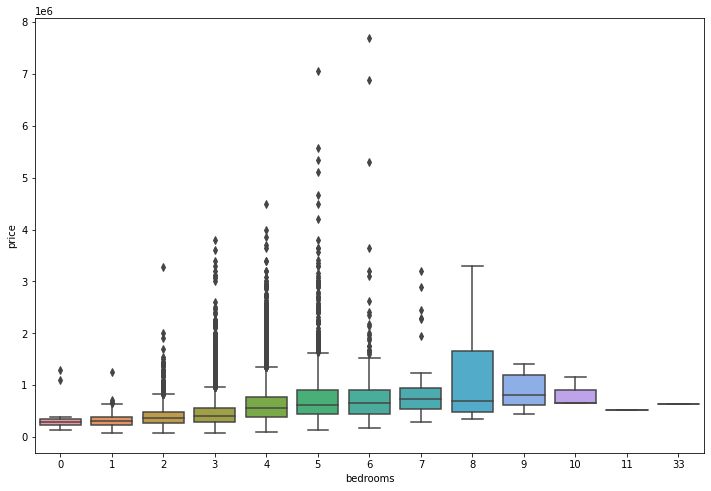

In [134]:
#Box plot - Bedrooms VS Price
plt.figure(figsize=(12,8))
sns.boxplot(data=king_county, y='price', x='bedrooms')

<AxesSubplot:xlabel='lat', ylabel='price'>

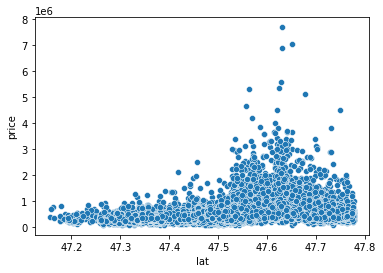

In [135]:
sns.scatterplot(data=king_county, x='lat', y='price')

<AxesSubplot:xlabel='long', ylabel='price'>

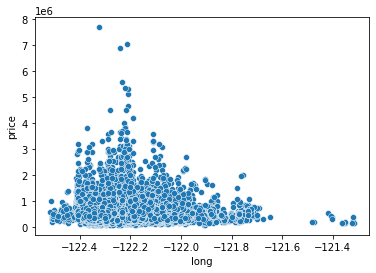

In [136]:
sns.scatterplot(data=king_county, x='long', y='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

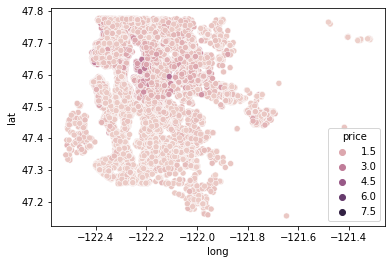

In [140]:
sns.scatterplot(data=king_county, x='long', y='lat', hue='price')

In [147]:
king_county['price'].sort_values(ascending=False).iloc[200:]

10468    2000000.0
15039    2000000.0
19215    2000000.0
4486     2000000.0
12613    2000000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21413, dtype: float64

In [13]:
valid_king_county = king_county.sort_values(by='price', ascending=False).iloc[200:]

In [14]:
valid_king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10468,1732800310,20150302T000000,2000000.0,4,3.75,2870,4500,2.0,0,3,...,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
15039,2726049034,20141110T000000,2000000.0,3,3.25,2610,16387,2.0,1,4,...,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19215,4131900042,20140516T000000,2000000.0,5,4.25,6490,10862,2.0,0,3,...,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
4486,1724069059,20140524T000000,2000000.0,5,4.00,4580,4443,3.0,1,4,...,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
12613,3225069241,20150422T000000,2000000.0,3,2.50,3490,21064,1.0,1,4,...,10,2290,1200,1968,0,98074,47.6092,-122.073,1780,15244


In [15]:
valid_king_county['price'].sort_values(ascending=False)

10468    2000000.0
4486     2000000.0
12613    2000000.0
15039    2000000.0
19215    2000000.0
           ...    
8274       82000.0
16198      81000.0
465        80000.0
15293      78000.0
1149       75000.0
Name: price, Length: 21413, dtype: float64

<AxesSubplot:xlabel='long', ylabel='lat'>

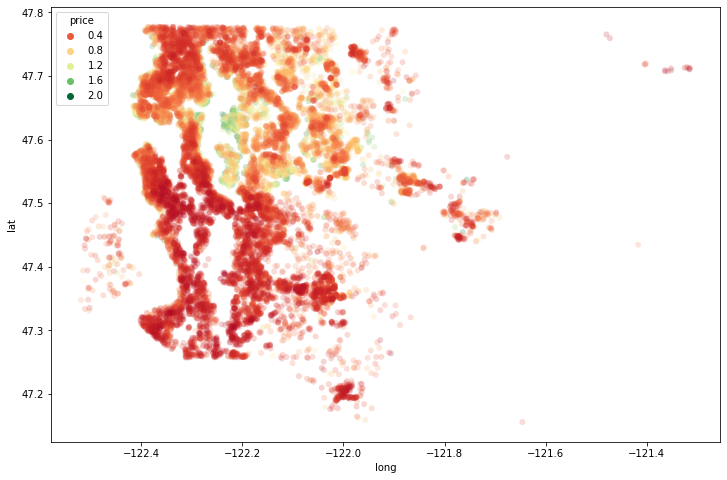

In [169]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=valid_king_county, x='long', y='lat', hue='price', palette='RdYlGn', edgecolor='none', alpha=0.2)

In [32]:
#View pricing for water view houses
#valid_king_county.head()

In [28]:
valid_king_county['waterfront'].value_counts()

0    21296
1      117
Name: waterfront, dtype: int64

<AxesSubplot:xlabel='waterfront', ylabel='price'>

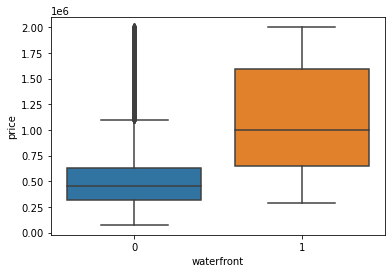

In [31]:
sns.boxplot(data=valid_king_county, x='waterfront', y='price')

# Feature Engineering

In [33]:
#Data Cleaning
valid_king_county.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10468,1732800310,20150302T000000,2000000.0,4,3.75,2870,4500,2.0,0,3,...,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
15039,2726049034,20141110T000000,2000000.0,3,3.25,2610,16387,2.0,1,4,...,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19215,4131900042,20140516T000000,2000000.0,5,4.25,6490,10862,2.0,0,3,...,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
4486,1724069059,20140524T000000,2000000.0,5,4.00,4580,4443,3.0,1,4,...,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
12613,3225069241,20150422T000000,2000000.0,3,2.50,3490,21064,1.0,1,4,...,10,2290,1200,1968,0,98074,47.6092,-122.073,1780,15244


In [35]:
valid_king_county = valid_king_county.drop('id', axis = 1)

In [36]:
valid_king_county.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10468,20150302T000000,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
15039,20141110T000000,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19215,20140516T000000,2000000.0,5,4.25,6490,10862,2.0,0,3,4,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
4486,20140524T000000,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
12613,20150422T000000,2000000.0,3,2.50,3490,21064,1.0,1,4,3,10,2290,1200,1968,0,98074,47.6092,-122.073,1780,15244


In [42]:
valid_king_county['yr_renovated'].value_counts(ascending=False)

0       20531
2014       91
2013       36
2000       34
2007       34
        ...  
1934        1
1954        1
1948        1
1959        1
1951        1
Name: yr_renovated, Length: 70, dtype: int64

In [44]:
valid_king_county['yr_renovated'].count()

21413

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

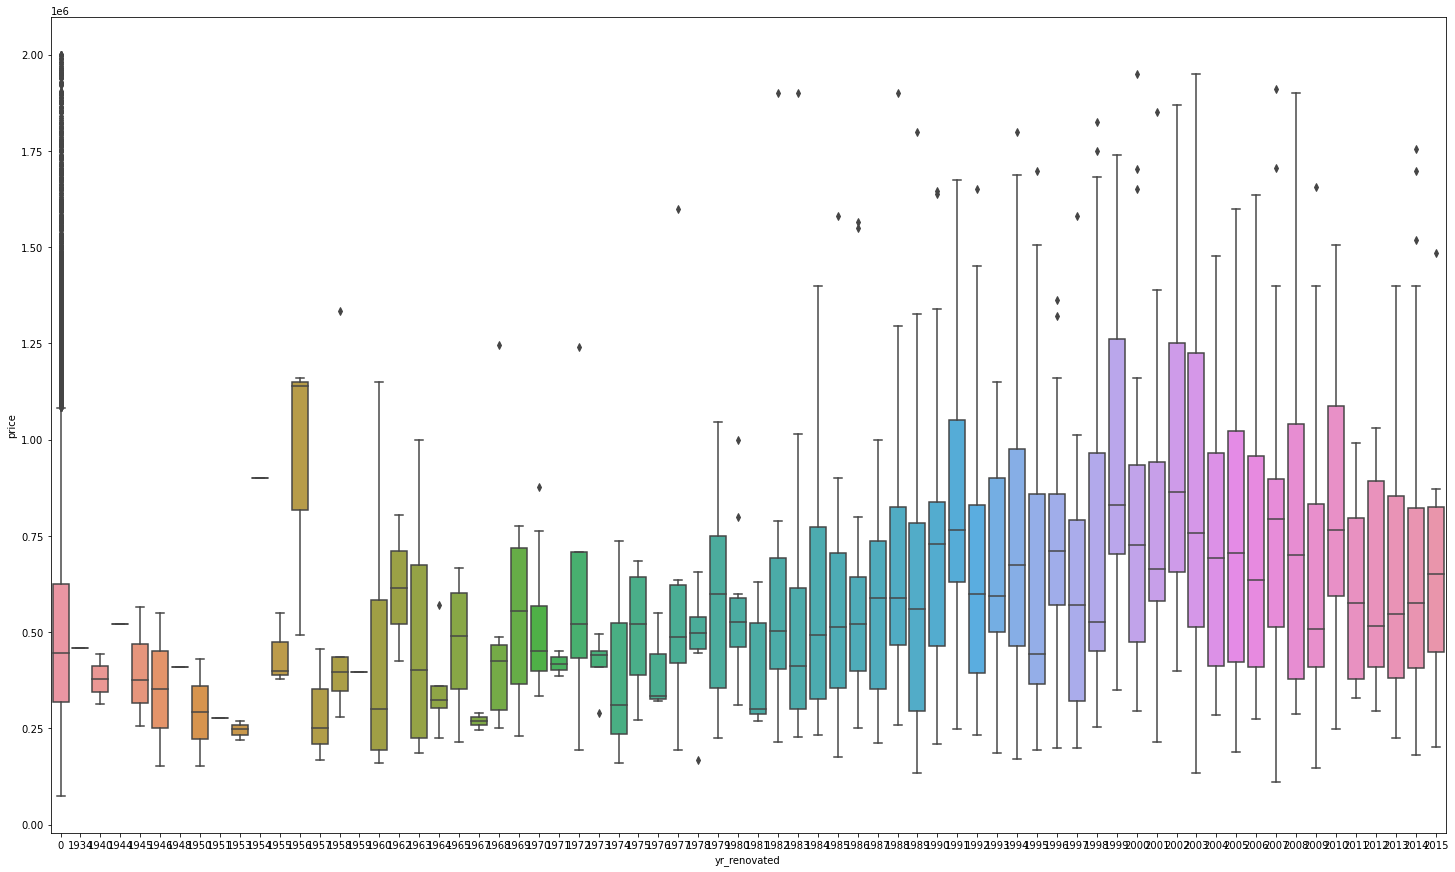

In [47]:
plt.figure(figsize=(25,15))
sns.boxplot(data = valid_king_county, x='yr_renovated', y='price')

In [48]:
#year of reinnovation
#As the only few houses are reinnovated in whole data set we can drop the column but as the data in the columns still can be used which out any dumies we are keepign it as it as

In [49]:
valid_king_county.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10468,20150302T000000,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
15039,20141110T000000,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19215,20140516T000000,2000000.0,5,4.25,6490,10862,2.0,0,3,4,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
4486,20140524T000000,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
12613,20150422T000000,2000000.0,3,2.50,3490,21064,1.0,1,4,3,10,2290,1200,1968,0,98074,47.6092,-122.073,1780,15244


In [ ]:
apply(lambda dt : datetime.date(dt))

In [63]:
pd.to_datetime('20141013T000000')

Timestamp('2014-10-13 00:00:00')

In [65]:
valid_king_county['date'] = valid_king_county['date'].apply(lambda dt : pd.to_datetime(dt))

In [66]:
valid_king_county.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10468,2015-03-02,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,98119,47.6291,-122.363,2870,6354
15039,2014-11-10,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,98125,47.7175,-122.278,2590,12958
19215,2014-05-16,2000000.0,5,4.25,6490,10862,2.0,0,3,4,11,3940,2550,1991,0,98040,47.5728,-122.205,3290,14080
4486,2014-05-24,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,98075,47.5682,-122.059,2710,4443
12613,2015-04-22,2000000.0,3,2.50,3490,21064,1.0,1,4,3,10,2290,1200,1968,0,98074,47.6092,-122.073,1780,15244


In [73]:
valid_king_county['date'][0].month

10

In [74]:
valid_king_county['month'] = valid_king_county['date'].apply(lambda dt : dt.month)
valid_king_county['year'] = valid_king_county['date'].apply(lambda dt : dt.year)

In [75]:
valid_king_county.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
10468,2015-03-02,2000000.0,4,3.75,2870,4500,2.0,0,3,3,...,360,2012,0,98119,47.6291,-122.363,2870,6354,3,2015
15039,2014-11-10,2000000.0,3,3.25,2610,16387,2.0,1,4,3,...,0,2006,0,98125,47.7175,-122.278,2590,12958,11,2014
19215,2014-05-16,2000000.0,5,4.25,6490,10862,2.0,0,3,4,...,2550,1991,0,98040,47.5728,-122.205,3290,14080,5,2014
4486,2014-05-24,2000000.0,5,4.00,4580,4443,3.0,1,4,3,...,0,2004,0,98075,47.5682,-122.059,2710,4443,5,2014
12613,2015-04-22,2000000.0,3,2.50,3490,21064,1.0,1,4,3,...,1200,1968,0,98074,47.6092,-122.073,1780,15244,4,2015


In [77]:
valid_king_county = valid_king_county.drop('date', axis=1)

In [78]:
valid_king_county.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
10468,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,...,360,2012,0,98119,47.6291,-122.363,2870,6354,3,2015
15039,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,...,0,2006,0,98125,47.7175,-122.278,2590,12958,11,2014
19215,2000000.0,5,4.25,6490,10862,2.0,0,3,4,11,...,2550,1991,0,98040,47.5728,-122.205,3290,14080,5,2014
4486,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,...,0,2004,0,98075,47.5682,-122.059,2710,4443,5,2014
12613,2000000.0,3,2.50,3490,21064,1.0,1,4,3,10,...,1200,1968,0,98074,47.6092,-122.073,1780,15244,4,2015


In [92]:
#Data Visualisation for months and years VS Price
#sns.histplot(data=valid_king_county, x='price', y='month')
#sns.boxplot(data=valid_king_county, y='price', x='month')


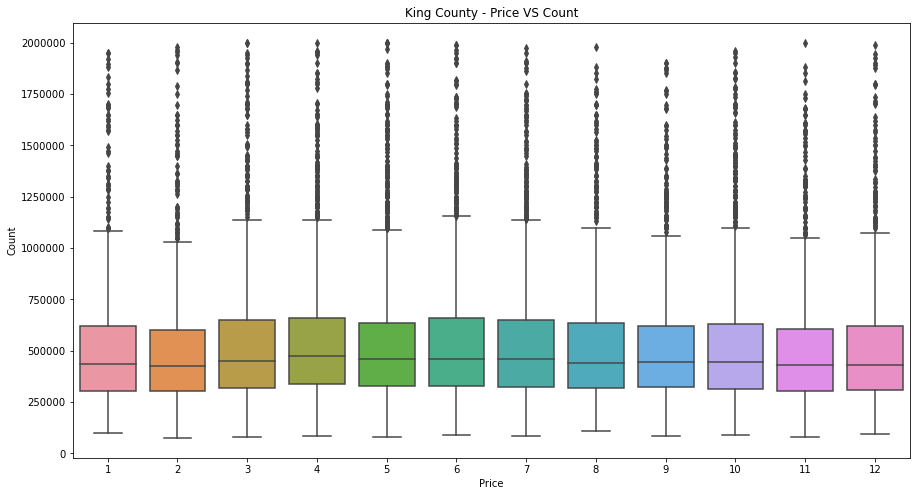

In [94]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
#plt.hist(king_county['price'])
#ax.ticklabel_format(style='plain')

sns.boxplot(data=valid_king_county, y='price', x='month')
ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("King County - Price VS Count")
plt.show()


<AxesSubplot:xlabel='month'>

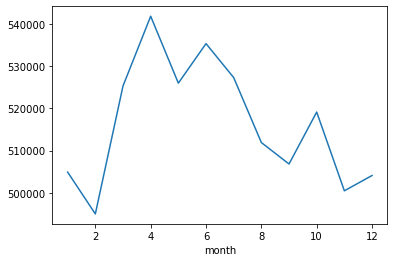

In [96]:
valid_king_county.groupby('month').mean()['price'].plot()

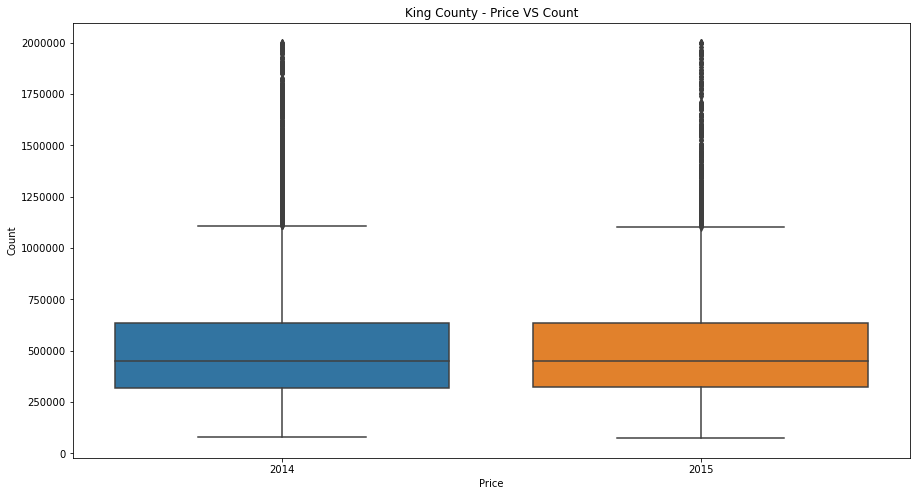

In [93]:
plt.figure(figsize=(15,8))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
#plt.hist(king_county['price'])
#ax.ticklabel_format(style='plain')

sns.boxplot(data=valid_king_county, y='price', x='year')
ax.set_xlabel("Price")
ax.set_ylabel("Count")
ax.set_title("King County - Price VS Count")
plt.show()


<AxesSubplot:xlabel='year'>

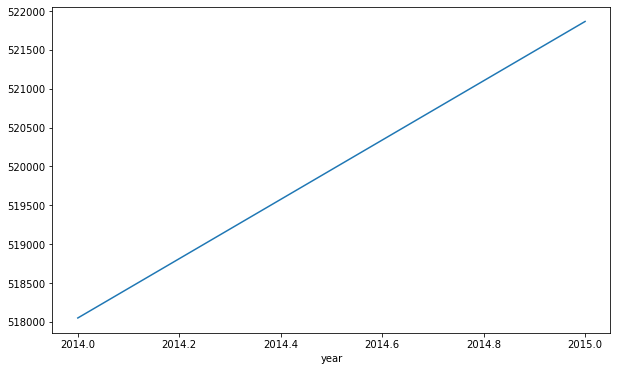

In [98]:
plt.figure(figsize=(10,6))
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
valid_king_county.groupby('year').mean()['price'].plot()

In [104]:
valid_king_county =  valid_king_county.drop('zipcode', axis = 1)

In [105]:
valid_king_county.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
10468,2000000.0,4,3.75,2870,4500,2.0,0,3,3,10,2510,360,2012,0,47.6291,-122.363,2870,6354,3,2015
15039,2000000.0,3,3.25,2610,16387,2.0,1,4,3,9,2610,0,2006,0,47.7175,-122.278,2590,12958,11,2014
19215,2000000.0,5,4.25,6490,10862,2.0,0,3,4,11,3940,2550,1991,0,47.5728,-122.205,3290,14080,5,2014
4486,2000000.0,5,4.00,4580,4443,3.0,1,4,3,10,4580,0,2004,0,47.5682,-122.059,2710,4443,5,2014
12613,2000000.0,3,2.50,3490,21064,1.0,1,4,3,10,2290,1200,1968,0,47.6092,-122.073,1780,15244,4,2015


# Cerate a keras model and train the data

In [106]:
#Split the data into traing set and test set
X = valid_king_county.drop('price', axis=1).values
y = valid_king_county['price'].values

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [111]:
#Scale the values
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
X_train = scaler.fit_transform(X_train)

In [114]:
X_test = scaler.fit_transform(X_test)

In [118]:
#Create the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [121]:
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [123]:
model.fit(x=X_test, y=y_test, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
51/51 [==============================] - 2s 15ms/step - loss: 359040811008.0000 - val_loss: 359039696896.0000
Epoch 2/400
51/51 [==============================] - 1s 11ms/step - loss: 359032979456.0000 - val_loss: 359014400000.0000
Epoch 3/400
51/51 [==============================] - 1s 11ms/step - loss: 358926155776.0000 - val_loss: 358736789504.0000
Epoch 4/400
51/51 [==============================] - 1s 11ms/step - loss: 358163939328.0000 - val_loss: 357098291200.0000
Epoch 5/400
51/51 [==============================] - 1s 12ms/step - loss: 354648948736.0000 - val_loss: 350697881600.0000
Epoch 6/400
51/51 [==============================] - 0s 7ms/step - loss: 343251615744.0000 - val_loss: 332368674816.0000
Epoch 7/400
51/51 [==============================] - 0s 8ms/step - loss: 315407859712.0000 - val_loss: 292514496512.0000
Epoch 8/400
51/51 [==============================] - 0s 7ms/step - loss: 262184075264.0000 - val_loss: 225210597376.0000
Epoch 9/400
51/51 [========

Epoch 69/400
51/51 [==============================] - 1s 11ms/step - loss: 28800636928.0000 - val_loss: 28683051008.0000
Epoch 70/400
51/51 [==============================] - 1s 10ms/step - loss: 28632238080.0000 - val_loss: 28490246144.0000
Epoch 71/400
51/51 [==============================] - 1s 10ms/step - loss: 28454236160.0000 - val_loss: 28328480768.0000
Epoch 72/400
51/51 [==============================] - 0s 10ms/step - loss: 28270841856.0000 - val_loss: 28167467008.0000
Epoch 73/400
51/51 [==============================] - 1s 10ms/step - loss: 28121507840.0000 - val_loss: 28014204928.0000
Epoch 74/400
51/51 [==============================] - 0s 9ms/step - loss: 27956914176.0000 - val_loss: 27871455232.0000
Epoch 75/400
51/51 [==============================] - 0s 8ms/step - loss: 27828203520.0000 - val_loss: 27729805312.0000
Epoch 76/400
51/51 [==============================] - 1s 11ms/step - loss: 27696396288.0000 - val_loss: 27610165248.0000
Epoch 77/400
51/51 [==============

51/51 [==============================] - 0s 9ms/step - loss: 23018108928.0000 - val_loss: 22993754112.0000
Epoch 204/400
51/51 [==============================] - 1s 11ms/step - loss: 23011766272.0000 - val_loss: 22977089536.0000
Epoch 205/400
51/51 [==============================] - 1s 10ms/step - loss: 22992631808.0000 - val_loss: 22973710336.0000
Epoch 206/400
51/51 [==============================] - 0s 10ms/step - loss: 22990278656.0000 - val_loss: 22952939520.0000
Epoch 207/400
51/51 [==============================] - 1s 10ms/step - loss: 22958592000.0000 - val_loss: 22943238144.0000
Epoch 208/400
51/51 [==============================] - 0s 9ms/step - loss: 22947233792.0000 - val_loss: 22967207936.0000
Epoch 209/400
51/51 [==============================] - 0s 8ms/step - loss: 22962728960.0000 - val_loss: 22917173248.0000
Epoch 210/400
51/51 [==============================] - 0s 8ms/step - loss: 22932867072.0000 - val_loss: 22927581184.0000
Epoch 211/400
51/51 [=====================

51/51 [==============================] - 0s 10ms/step - loss: 22112493568.0000 - val_loss: 22098933760.0000
Epoch 338/400
51/51 [==============================] - 1s 13ms/step - loss: 22142142464.0000 - val_loss: 22091220992.0000
Epoch 339/400
51/51 [==============================] - 1s 11ms/step - loss: 22109941760.0000 - val_loss: 22109532160.0000
Epoch 340/400
51/51 [==============================] - 1s 10ms/step - loss: 22115538944.0000 - val_loss: 22090403840.0000
Epoch 341/400
51/51 [==============================] - 1s 10ms/step - loss: 22115846144.0000 - val_loss: 22117322752.0000
Epoch 342/400
51/51 [==============================] - 1s 10ms/step - loss: 22095241216.0000 - val_loss: 22076180480.0000
Epoch 343/400
51/51 [==============================] - 1s 10ms/step - loss: 22113730560.0000 - val_loss: 22090178560.0000
Epoch 344/400
51/51 [==============================] - 1s 10ms/step - loss: 22112108544.0000 - val_loss: 22074640384.0000
Epoch 345/400
51/51 [=================

In [125]:
loss = model.history.history

In [126]:
lossdf = pd.DataFrame(loss)

<AxesSubplot:>

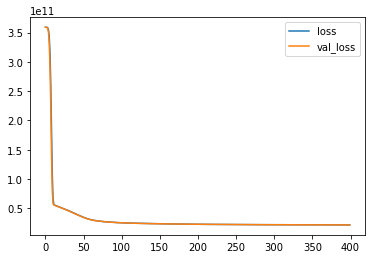

In [128]:
lossdf.plot()

In [132]:
#View Metrics
from  sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [133]:
predictions = model.predict(X_test)

In [134]:
predictions

array([[993021.06],
       [286606.34],
       [507906.88],
       ...,
       [268923.97],
       [398530.6 ],
       [394505.47]], dtype=float32)

In [135]:
mean_absolute_error(y_test, predictions)

99851.64468265975

In [136]:
explained_variance_score(y_test, predictions)

0.738120146555905

In [138]:
#sns.scatterplot(y_test,predictions)

In [142]:
#output = pd.DataFrame([#y_test, predictions], columns=['y_test', 'pred'])

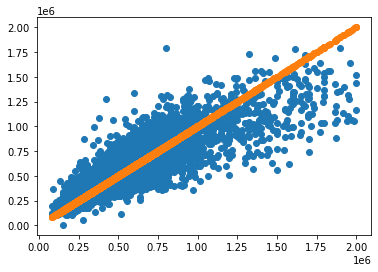

In [144]:
plt.scatter(y_test, predictions)
plt.scatter(y_test, y_test)

In [159]:
house_for_sale = valid_king_county.drop('price', axis=1).iloc[1].values

In [162]:
valid_king_county['price'].iloc[1]

2000000.0

In [164]:
house_for_sale

array([ 3.00000e+00,  3.25000e+00,  2.61000e+03,  1.63870e+04,
        2.00000e+00,  1.00000e+00,  4.00000e+00,  3.00000e+00,
        9.00000e+00,  2.61000e+03,  0.00000e+00,  2.00600e+03,
        0.00000e+00,  4.77175e+01, -1.22278e+02,  2.59000e+03,
        1.29580e+04,  1.10000e+01,  2.01400e+03])

In [171]:
shaped_test_data = house_for_sale.reshape(-1,19)

In [172]:
scaled_test_data = scaler.transform(shaped_test_data)

In [173]:
scaled_test_data

array([[0.09090909, 0.43333333, 0.30416667, 0.00958028, 0.4       ,
        1.        , 1.        , 0.5       , 0.66666667, 0.36806723,
        0.        , 0.92173913, 0.        , 0.89959772, 0.19699499,
        0.39962477, 0.01413706, 0.90909091, 0.        ]])

In [174]:
model.predict(scaled_test_data)

array([[1211062.6]], dtype=float32)